In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file_path = r"C:\Users\VOSTRO 16\Downloads\supermarket_sales.csv"
df = pd.read_csv(file_path)

In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [16]:
print(df.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

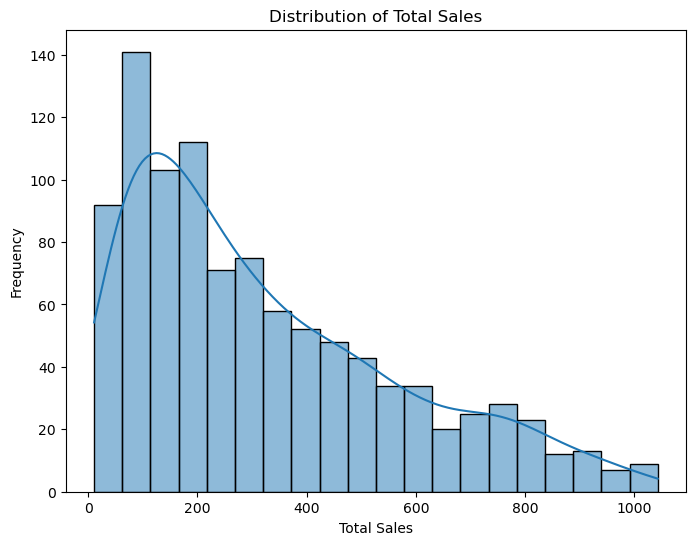

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Total'], bins=20, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

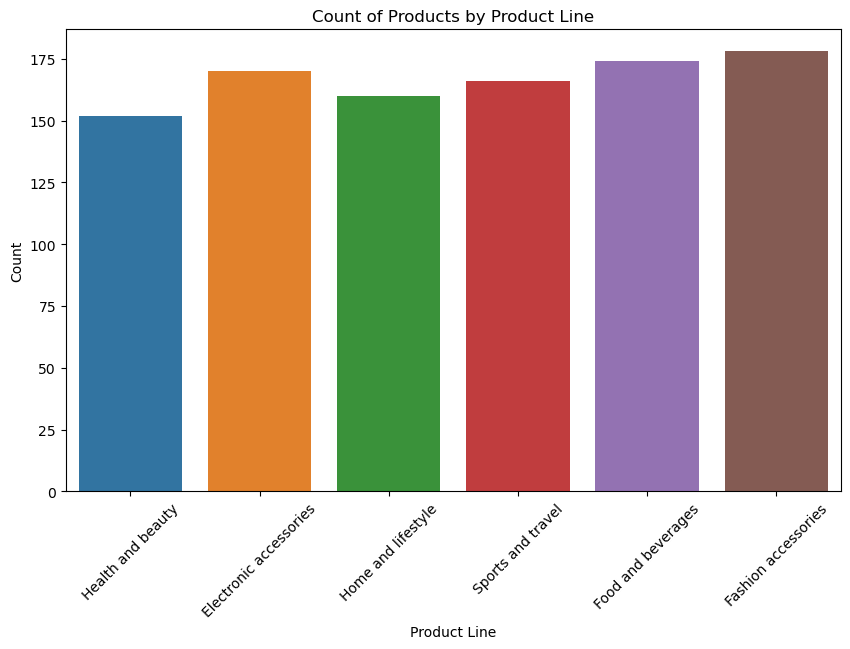

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product line')
plt.title('Count of Products by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


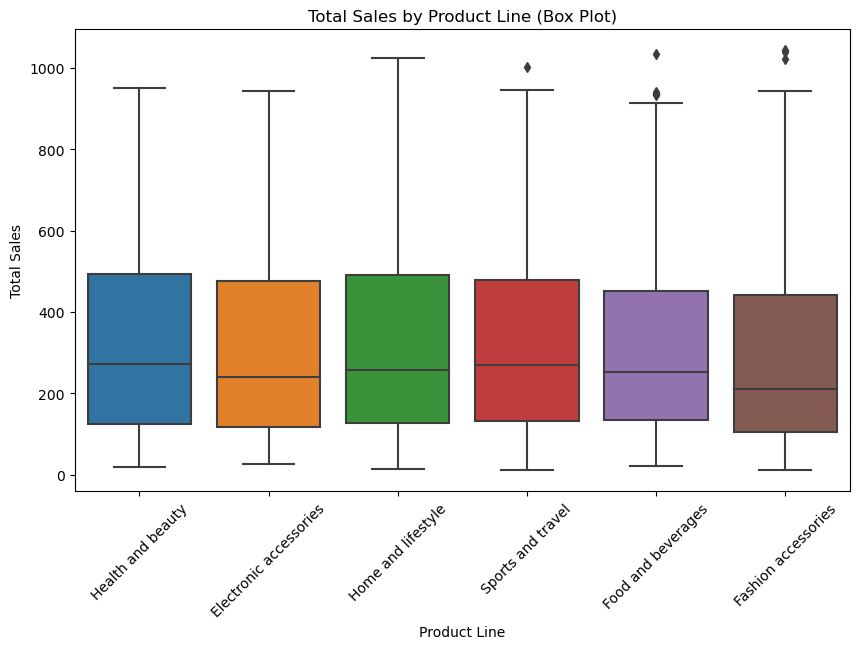

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product line', y='Total')
plt.title('Total Sales by Product Line (Box Plot)')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

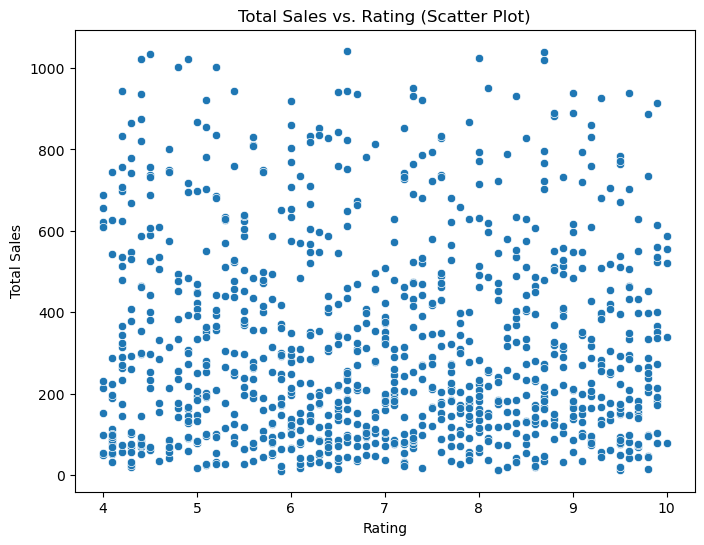

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rating', y='Total')
plt.title('Total Sales vs. Rating (Scatter Plot)')
plt.xlabel('Rating')
plt.ylabel('Total Sales')
plt.show()

<h3>1) Sales data categorized by year


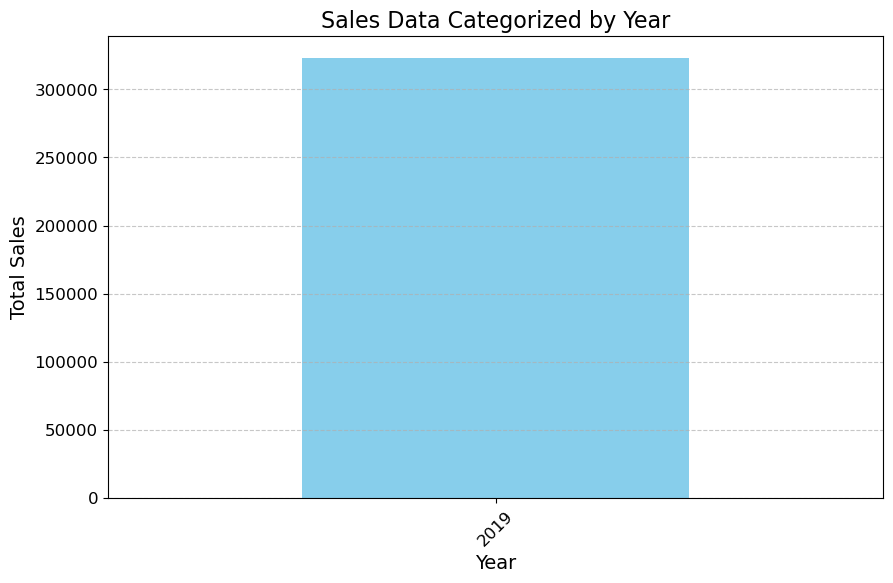

In [40]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
sales_by_year = df.groupby('Year')['Total'].sum()
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Sales Data Categorized by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3>2) Sales data categorized by month

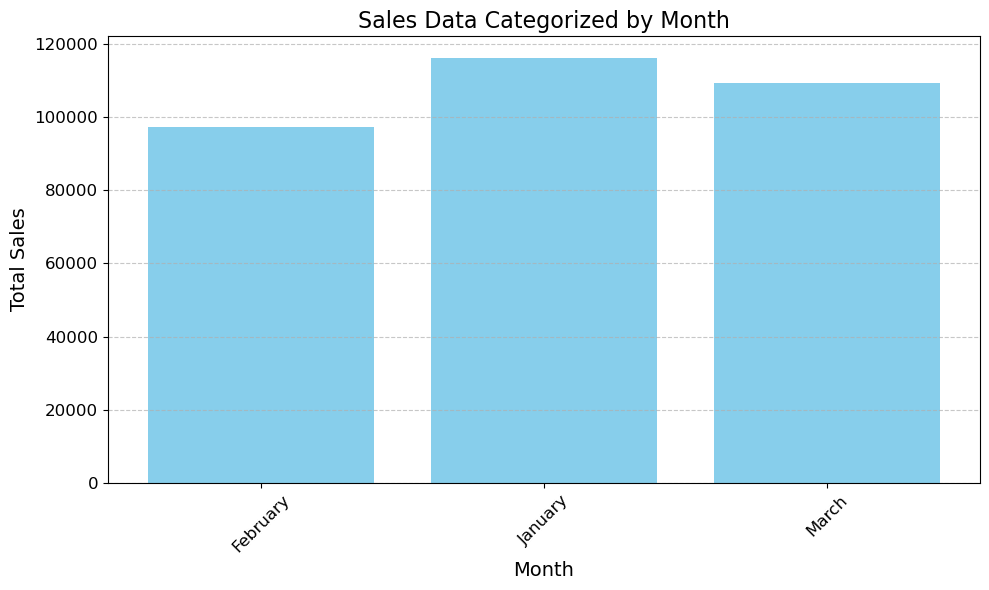

In [41]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
sales_by_month = df.groupby('Month')['Total'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(sales_by_month['Month'], sales_by_month['Total'], color='skyblue')
plt.title('Sales Data Categorized by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>3) Sales data categorized by gender

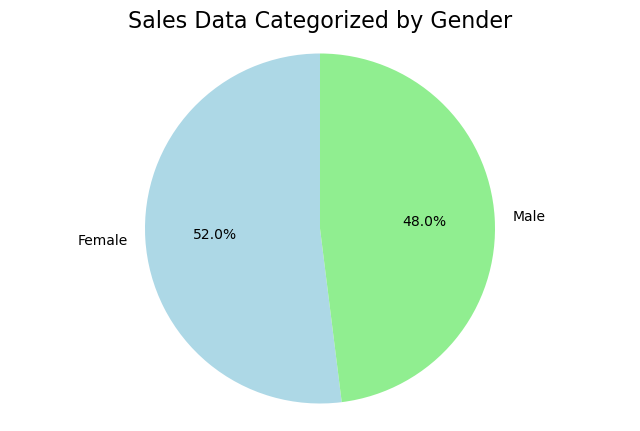

In [28]:
sales_by_gender = df.groupby('Gender')['Total'].sum()
plt.figure(figsize=(8, 5))
colors = ['lightblue', 'lightgreen']
plt.pie(sales_by_gender, labels=sales_by_gender.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sales Data Categorized by Gender', fontsize=16)
plt.axis('equal')
plt.show()

<h3>4) Sales data categorized by city

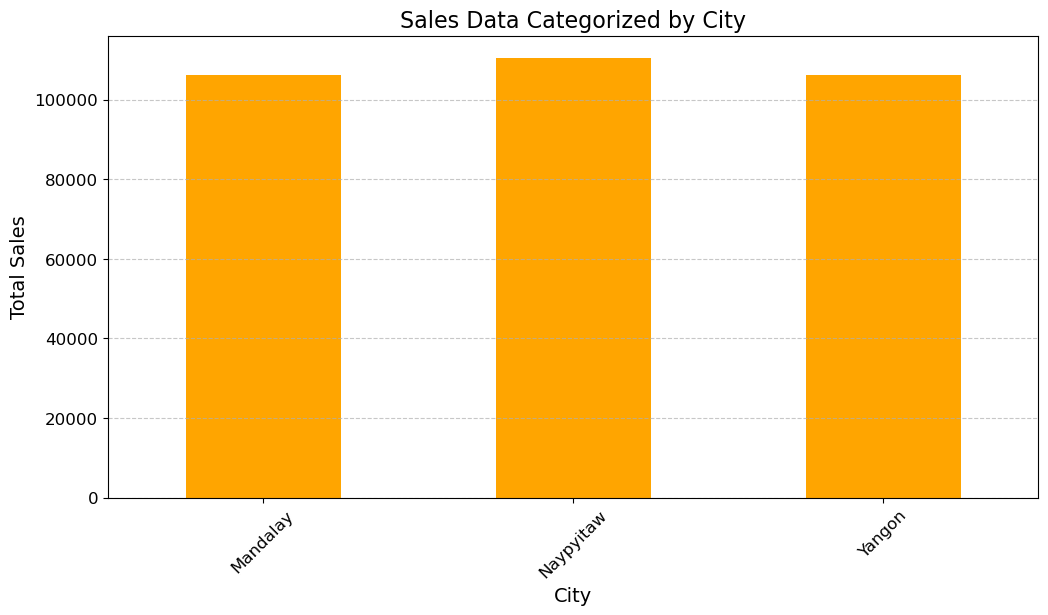

In [29]:
sales_by_city = df.groupby('City')['Total'].sum()
plt.figure(figsize=(12, 6))
sales_by_city.plot(kind='bar', color='orange')
plt.title('Sales Data Categorized by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h3>5) Sales data categorized by payment type

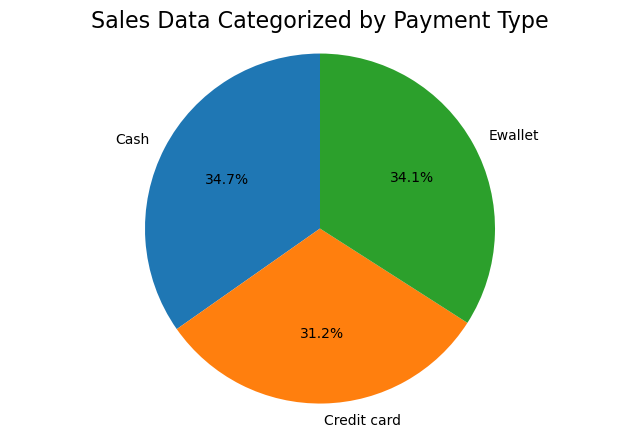

In [30]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
sales_by_payment = df.groupby('Payment')['Total'].sum()
plt.figure(figsize=(8, 5))
plt.pie(sales_by_payment, labels=sales_by_payment.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sales Data Categorized by Payment Type', fontsize=16)
plt.axis('equal')
plt.show()

<h3>6) Sales data categorized by product line, including gross income

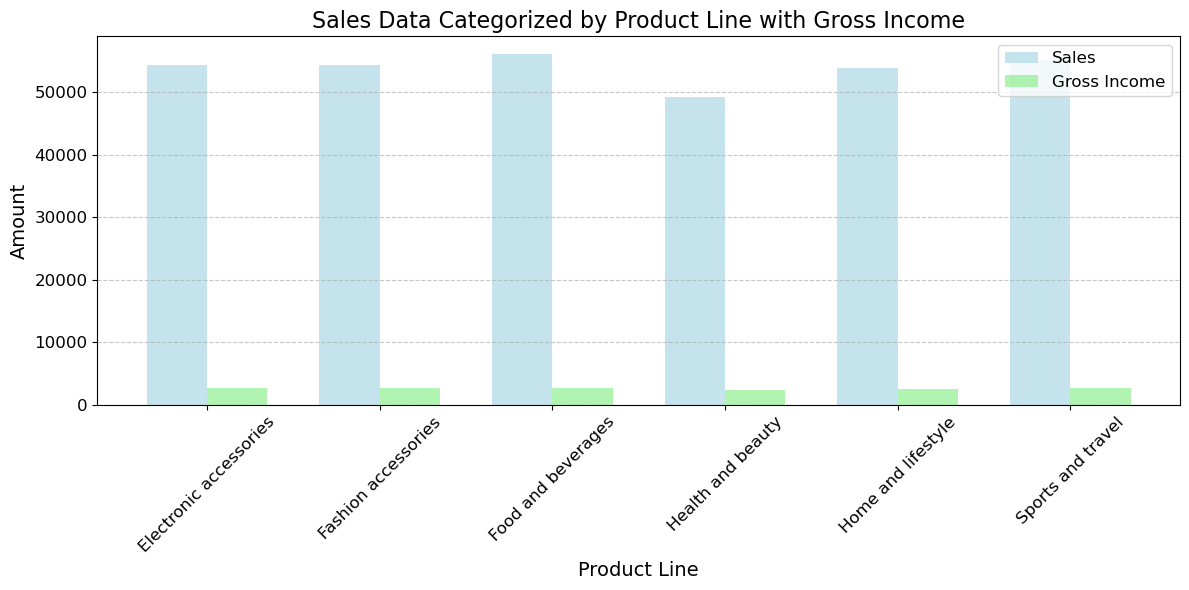

In [31]:
sales_by_product_line = df.groupby('Product line')['Total'].sum()
gross_income_by_product_line = df.groupby('Product line')['gross income'].sum()
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(sales_by_product_line))
plt.bar(index, sales_by_product_line, width=bar_width, label='Sales', color='lightblue', alpha=0.7)
plt.bar([i + bar_width for i in index], gross_income_by_product_line, width=bar_width, label='Gross Income', color='lightgreen', alpha=0.7)
plt.title('Sales Data Categorized by Product Line with Gross Income', fontsize=16)
plt.xlabel('Product Line', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks([i + bar_width/2 for i in index], sales_by_product_line.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>7) Trend analysis of sales over time

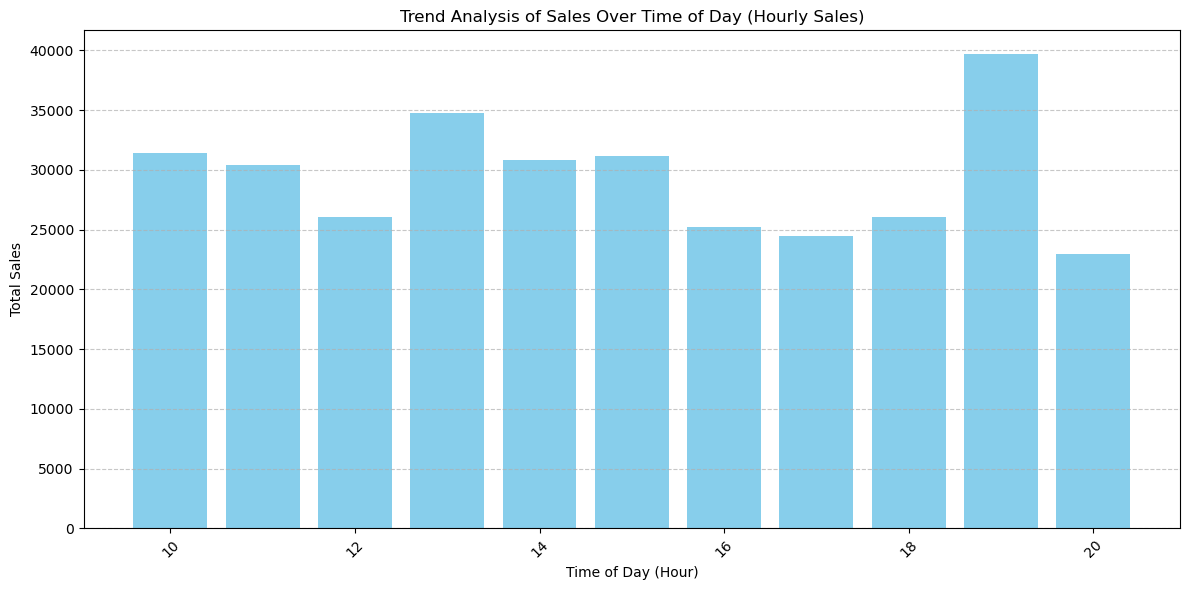

In [51]:
df['Time'] = pd.to_datetime(df['Time'])
sales_by_time = df.groupby(df['Time'].dt.hour)['Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(sales_by_time['Time'], sales_by_time['Total'], color='skyblue')
plt.title('Trend Analysis of Sales Over Time of Day (Hourly Sales)')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>8) Average ratings for each product line

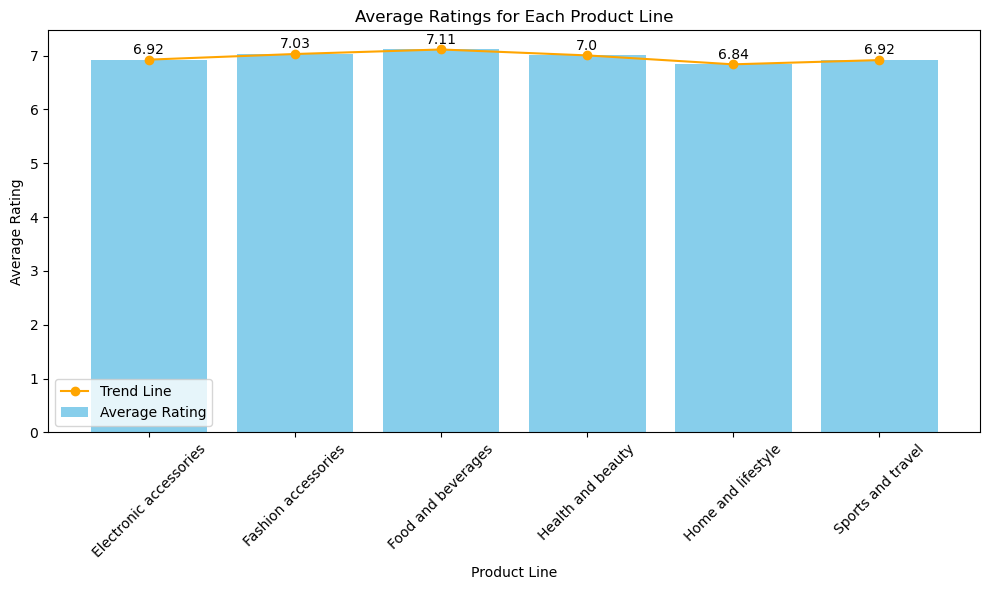

In [52]:
avg_ratings = df.groupby('Product line')['Rating'].mean().reset_index()

# Plotting the bar graph for average ratings
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_ratings['Product line'], avg_ratings['Rating'], color='skyblue', label='Average Rating')

# Overlaying a line plot to show trend of average ratings
line = plt.plot(avg_ratings['Product line'], avg_ratings['Rating'], marker='o', color='orange', label='Trend Line')

plt.title('Average Ratings for Each Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend()

# Adding values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()